In [102]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.cluster import KMeans

In [18]:
INPUT_PATH = 'inputs/dataset'
ATTRIBUTES = ["COMPACTNESS","CIRCULARITY","DISTANCE_CIRCULARITY","RADIUS_RATIO","PR_AXIS_ASPECT_RATIO",
              "MAX_LENGTH_ASPECT_RATIO","SCATTER RATIO","ELONGATEDNESS","PR_AXIS_RECTANGULARITY","MAX_LENGTH_RECTANGULARITY",
             "SCALED_VARIANCE_ALONG_MAJOR_AXIS","SCALED_VARIANCE_ALONG_MINOR_AXIS","SCALED_RADIUS_OF_GYRATION",
             "SKEWNESS_ABOUT_MAJOR_AXIS","SKEWNESS_ABOUT_MINOR_AXIS","KURTOSIS_ABOUT_MAJOR_AXIS","KURTOSIS_ABOUT_MINOR_AXIS","HOLLOWS RATIO","VEHICLE"]


In [29]:
glob.glob(INPUT_PATH+"/*.dat")

['inputs/dataset/xaf.dat',
 'inputs/dataset/xag.dat',
 'inputs/dataset/xac.dat',
 'inputs/dataset/xah.dat',
 'inputs/dataset/xab.dat',
 'inputs/dataset/xae.dat',
 'inputs/dataset/xaa.dat',
 'inputs/dataset/xad.dat',
 'inputs/dataset/xai.dat']

In [26]:
"""This function will help us read data from all our entries and return a single unified dataframe"""
def read_data():
    
    df = pd.concat([pd.read_csv(file, sep=" ",index_col=False,header=None,names=ATTRIBUTES) for file
                    in glob.glob(INPUT_PATH+"/*.dat")],ignore_index=True)
    return df

In [33]:
df = read_data()
df.shape

(846, 19)

In [50]:
df

COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0             91           44                    66           151   
1            104           55                   109           230   
2            105           50                    93           173   
3            107           56                   105           202   
4             82           40                    73           141   
..           ...          ...                   ...           ...   
841           93           39                    87           183   
842           89           46                    84           163   
843          106           54                   101           222   
844           86           36                    78           146   
845           85           36                    66           123   

     PR_AXIS_ASPECT_RATIO  MAX_LENGTH_ASPECT_RATIO  SCATTER RATIO  \
0                      63                        7            137   
1                      67                       12            218   
2                      54                        4            222   
3                      61                       11            221   
4                      57                        8            153   
..                    ...                      ...            ...   
841                    64                        8            169   
842                    66                       11            159   
843                    67                       12            222   
844                    58                        7            135   
845                    55                        5            120   

     ELONGATEDNESS  PR_AXIS_RECTANGULARITY  MAX_LENGTH_RECTANGULARITY  \
0               48                      18                        146   
1               30                      24                        174   
2               30                      25                        159   
3               30                      25                        179   
4               44                      19                        133   
..             ...                     ...                        ...   
841             40                      20                        134   
842             43                      20                        159   
843             30                      25                        173   
844             50                      18                        124   
845             56                      17                        128   

     SCALED_VARIANCE_ALONG_MAJOR_AXIS  SCALED_VARIANCE_ALONG_MINOR_AXIS  \
0                                 166                               280   
1                                 230                               706   
2                                 254                               735   
3                                 234                               725   
4                                 173                               342   
..                                ...                               ...   
841                               200                               422   
842                               173                               368   
843                               228                               721   
844                               155                               270   
845                               140                               212   

     SCALED_RADIUS_OF_GYRATION  SKEWNESS_ABOUT_MAJOR_AXIS  \
0                          167                         72   
1                          226                         67   
2                          206                         83   
3                          212                         72   
4                          153                         75   
..                         ...                        ...   
841                        149                         72   
842                        176                         72   
843                 

We have 846 entries in our dataset. Each entry is described by 19 attributes, one of them being the name of the car model

In [32]:
df.describe()

COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.861702             82.088652    168.940898   
std       8.234474     6.169866             15.771533     33.472183   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       PR_AXIS_ASPECT_RATIO  MAX_LENGTH_ASPECT_RATIO  SCATTER RATIO  \
count            846.000000               846.000000     846.000000   
mean              61.693853                 8.567376     168.839243   
std                7.888251                 4.601217      33.244978   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.250000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       ELONGATEDNESS  PR_AXIS_RECTANGULARITY  MAX_LENGTH_RECTANGULARITY  \
count     846.000000              846.000000                 846.000000   
mean       40.933806               20.582742                 147.998818   
std         7.811560                2.592138                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       SCALED_VARIANCE_ALONG_MAJOR_AXIS  SCALED_VARIANCE_ALONG_MINOR_AXIS  \
count                        846.000000                        846.000000   
mean                         188.625296                        439.911348   
std                           31.394837                        176.692614   
min                          130.000000                        184.000000   
25%                          167.000000                        318.250000   
50%                          178.500000                        364.000000   
75%                          217.000000                        587.000000   
max                          320.000000                       1018.000000   

       SCALED_RADIUS_OF_GYRATION  SKEWNESS_ABOUT_MAJOR_AXIS  \
count                  846.00000                 846.000000   
mean                   174.70331                  72.462175   
std                     32.54649                   7.486974   
min                    109.00000                  59.000000   
25%                    149.00000                  67.000000   
50%                    173.00000                  71.500000   
75%                    198.00000                  75.000000   
max                    268.00000                 135.000000   

       SKEWNESS_ABOUT_MINOR_AXIS  KURTOSIS_ABOUT_MAJOR_AXIS  \
count                 846.000000                 846.000000   
mean                    6.377069                  12.599291   
std                     4.918353                   8.931240   
min                     0.000000                   0.000000   
25%                     2.000000                   5.000000   
50%                     6.000000                  11.000000   
75%                     9.000000                  19.000000   
max                    22.000000                  41.000000   

       KURTOSIS_ABOUT_MINOR_AXIS  HOLLOWS RATIO  
count                 846.000000     846.000000  
mean                  188.932624     195.632388  
std                     6.163949       7.438797  
min                  

The first look of our data allows us to capture the following elements:
* All our variables are continuous except the last one which is the name of the car model and will be used for classification
* It looks like we do not have null or empty values (Except if the zero value for some attribute was meaning null value, but we do not have that kind of information from the data publisher) since the count of every attribute is 846

In [37]:
df.isnull().sum()

COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE_CIRCULARITY                0
RADIUS_RATIO                        0
PR_AXIS_ASPECT_RATIO                0
MAX_LENGTH_ASPECT_RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR_AXIS_RECTANGULARITY              0
MAX_LENGTH_RECTANGULARITY           0
SCALED_VARIANCE_ALONG_MAJOR_AXIS    0
SCALED_VARIANCE_ALONG_MINOR_AXIS    0
SCALED_RADIUS_OF_GYRATION           0
SKEWNESS_ABOUT_MAJOR_AXIS           0
SKEWNESS_ABOUT_MINOR_AXIS           0
KURTOSIS_ABOUT_MAJOR_AXIS           0
KURTOSIS_ABOUT_MINOR_AXIS           0
HOLLOWS RATIO                       0
VEHICLE                             0
dtype: int64

## Data visualisation

<AxesSubplot:title={'center':'Distribution of each car model in our dataset'}, xlabel='VEHICLE', ylabel='count'>

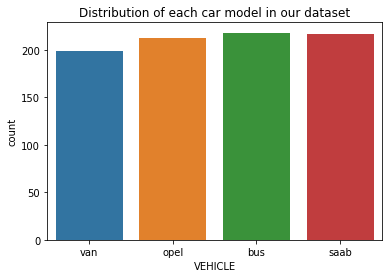

In [89]:
plt.title("Distribution of each car model in our dataset")
sns.countplot(df["VEHICLE"])

This figure represent the distribution of car model in our dataset.
As we can see, we have five car models (van, opel, bus, saab) and they globally well balanced between 200 and 220 examples per car model in our dataset

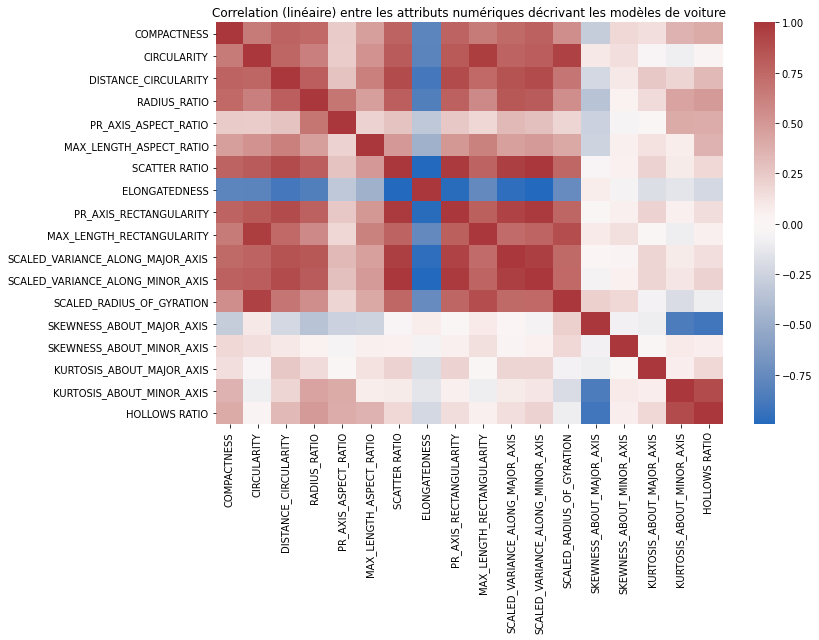

In [99]:
plt.figure(figsize=(12,9),tight_layout=True)
ax = plt.subplot(1,1,1)
sns.heatmap(df.corr(method="spearman"),cmap="vlag",center=0,ax=ax)
ax.set_title("Correlation (linéaire) entre les attributs numériques décrivant les modèles de voiture")
plt.tight_layout()

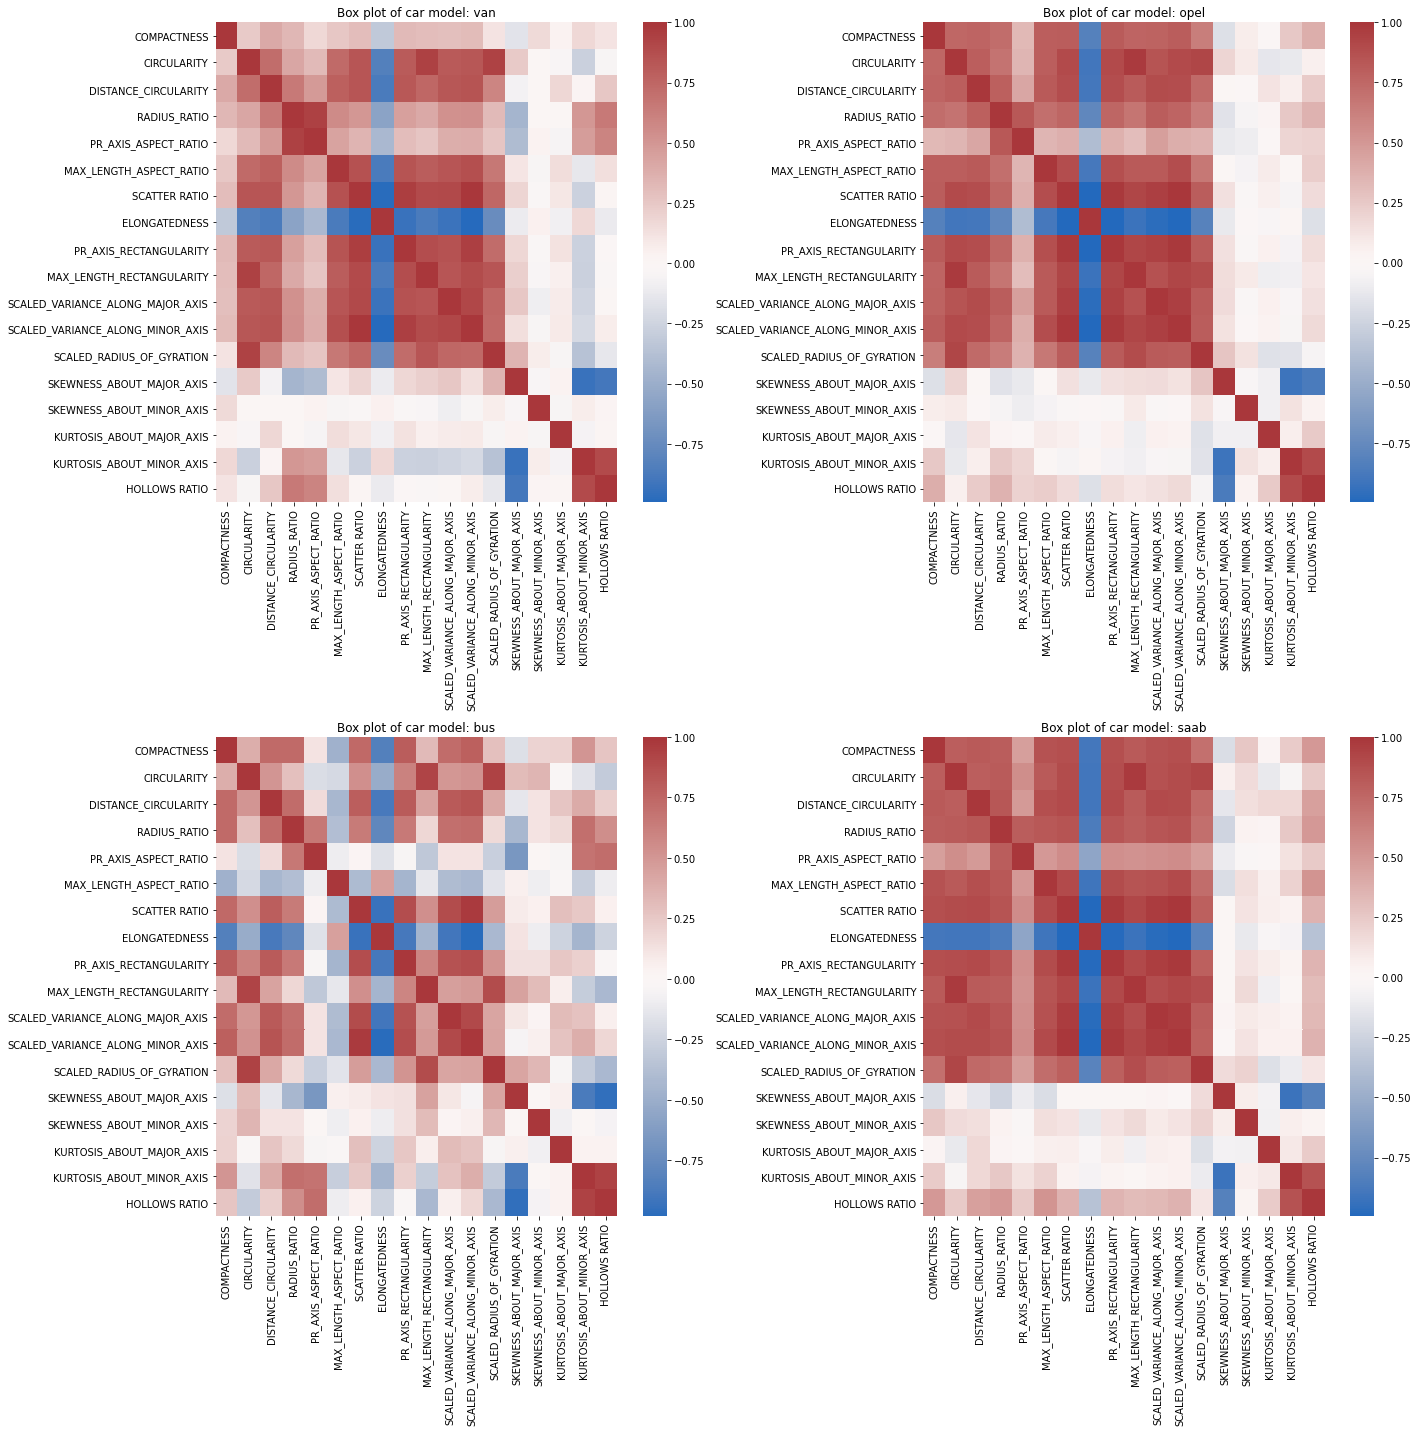

In [101]:
plt.figure(figsize=(20,20))
for i,c in enumerate(df["VEHICLE"].unique()):
    
    ax = plt.subplot(2,2,i+1)
    
    sns.heatmap(df.loc[df["VEHICLE"]==c,:].corr(method="spearman"),cmap="vlag",center=0,ax=ax)
    ax.set_title("Box plot of car model: %s"%c)
    
plt.tight_layout()

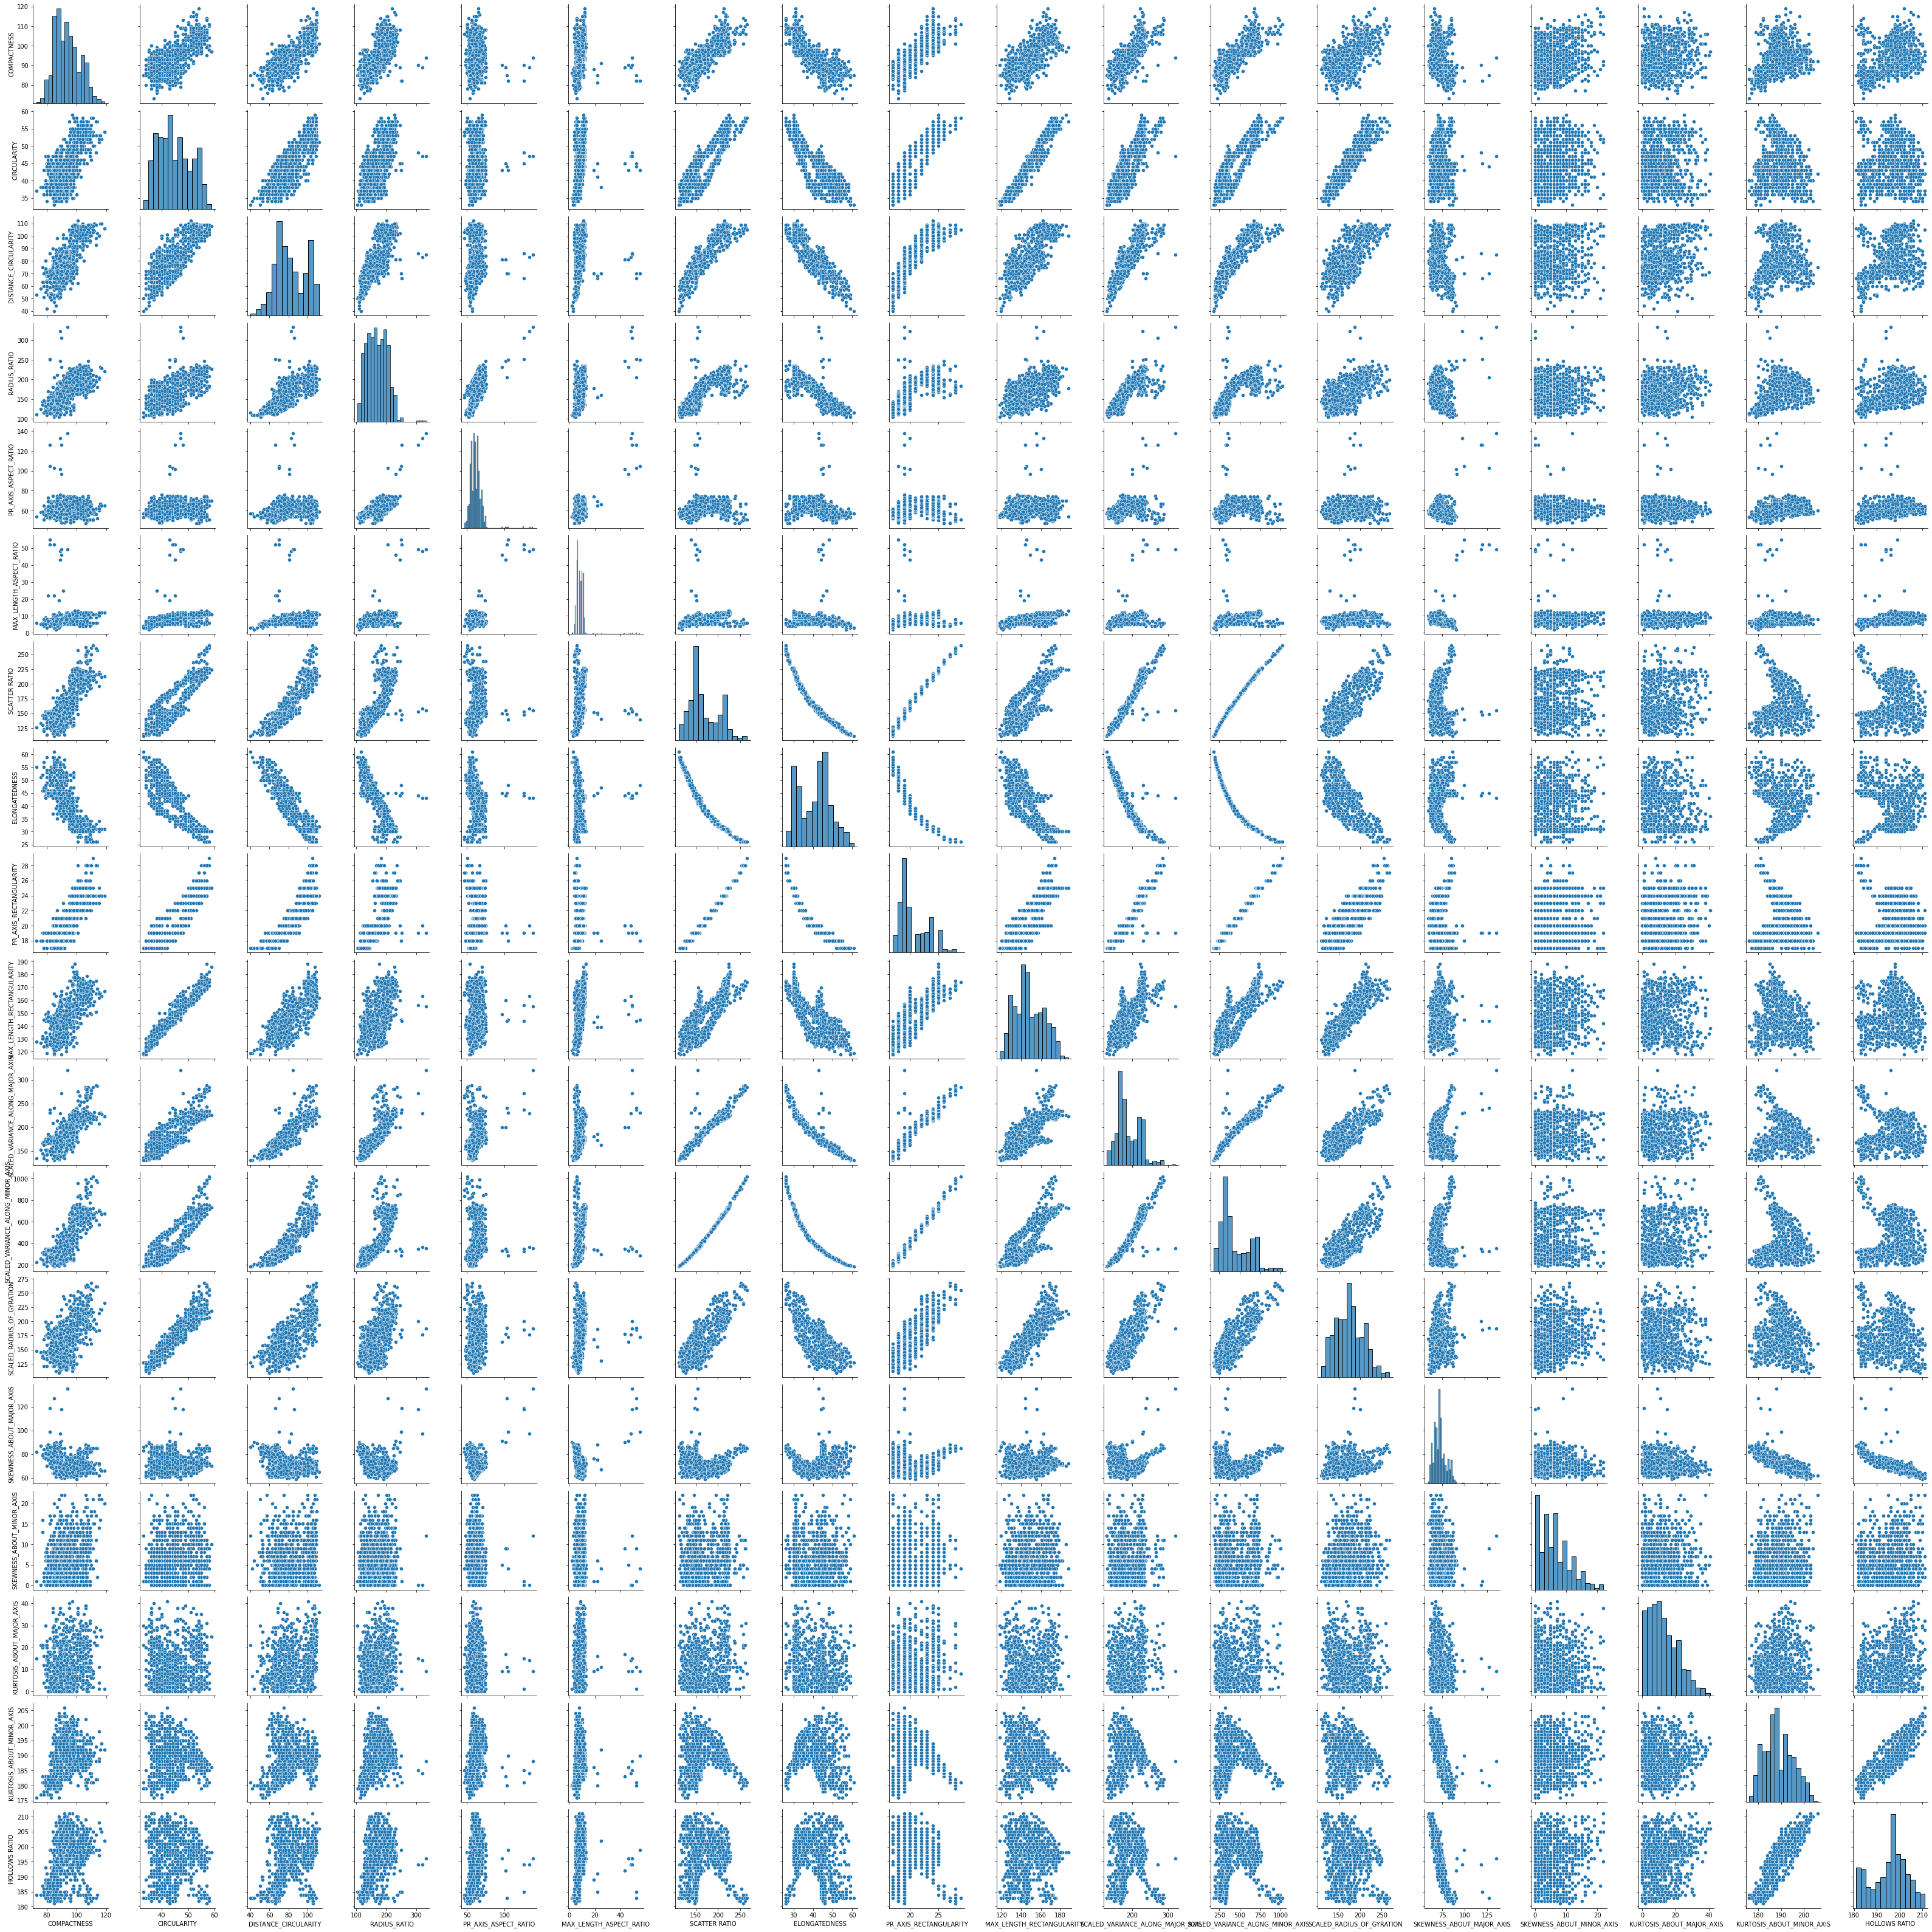

In [42]:
sns.pairplot(df)

In [74]:
df["VEHICLE"].unique()

array(['van', 'opel', 'bus', 'saab'], dtype=object)

In [ ]:
df.loc[df["VEHICLE"]==c,:]

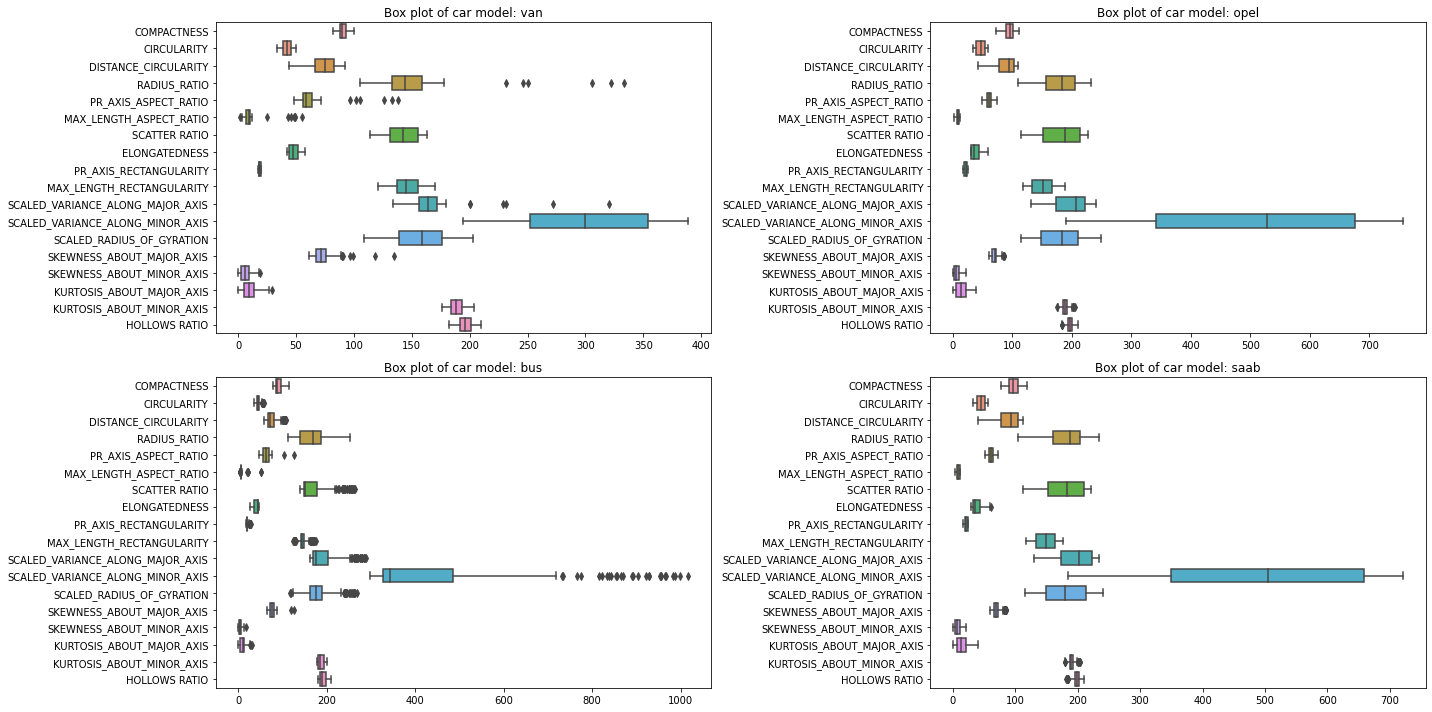

In [71]:
plt.figure(figsize=(20,10))
for i,c in enumerate(df["VEHICLE"].unique()):
    
    ax = plt.subplot(2,2,i+1)
    sns.boxplot(data=df.loc[df["VEHICLE"]==c,:],orient="h",ax=ax)
    ax.set_title("Box plot of car model: %s"%c)
    
plt.tight_layout()
    

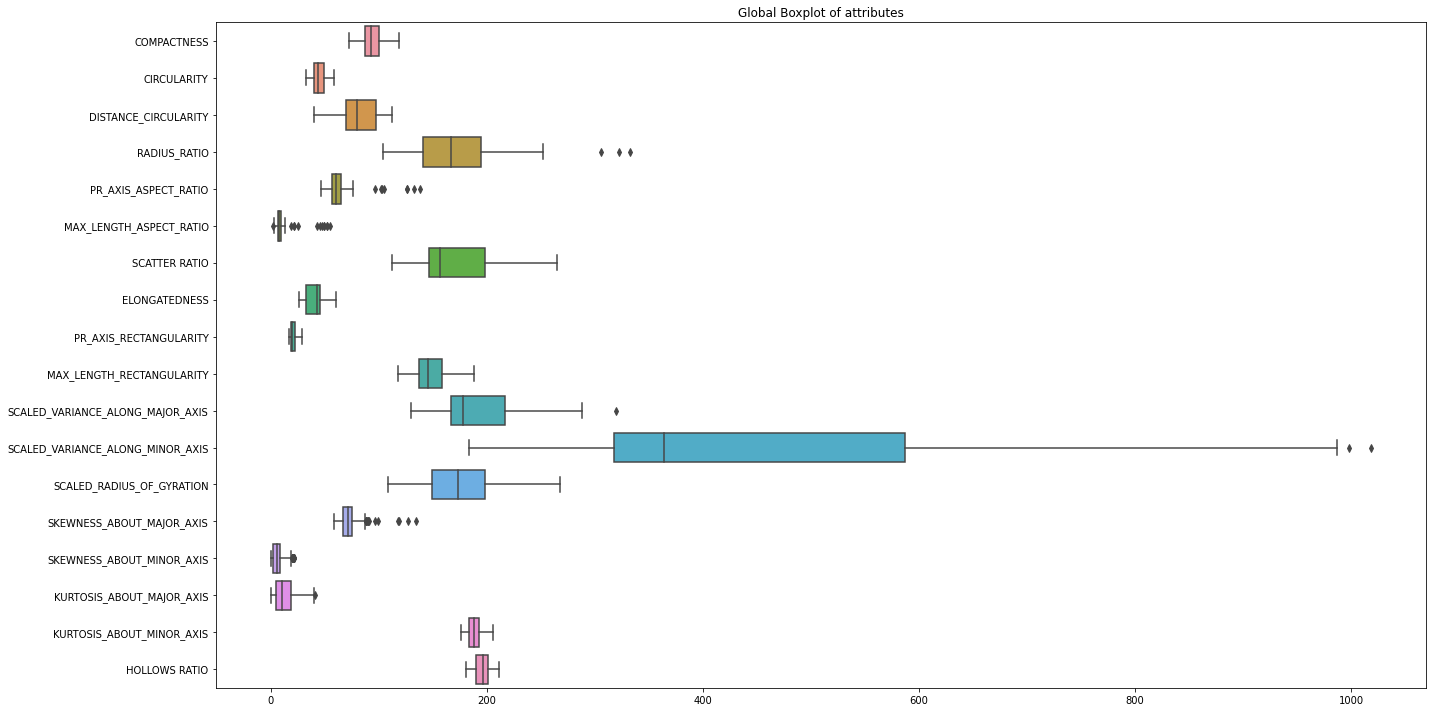

In [88]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df,orient="h")
plt.title("Global Boxplot of attributes")
plt.tight_layout()

## Unsupervised Learning

In [111]:
#number_of_cluster = [2,3,4,5,6,7,8,9,10]
#kmeans_list = []

kmeans = KMeans(n_clusters=2)
X_new = kmeans.fit_transform(df.loc[:,ATTRIBUTES[:-1]].to_numpy())

<AxesSubplot:>

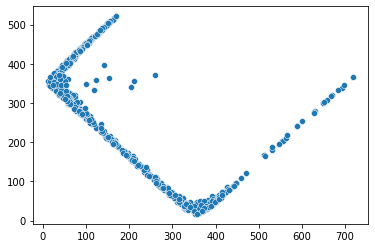

In [119]:
sns.scatterplot(y=X_new[:,0],x=X_new[:,1])

18